# A Tour of SciKit-Learn

When we talk about Data Science and the Data Science Pipeline, we are typically talking about the management of data flows for a specific purpose - the modeling of some hypothesis. The models that we construct can then be used in Data Products as an engine to create more data and actionable results. Machine learning is the art of training some model by using existing data along with a statistical method to create a parametric representation of a model that fits the data. That’s kind of a mouthful, but what that essentially means is that a machine learning algorithm uses statistical processes to learn from examples, then applies what it has learned to future inputs to predict an outcome.

Machine learning can classically be summarized with two methodologies: supervised and unsupervised learning. In supervised learning, the “correct answers” are annotated ahead of time and the algorithm tries to fit a decision space based on those answers. In unsupervised learning, algorithms try to group like examples together, inferring similarities via distance metrics. Machine learning allows us to handle new data in a meaningful way, predicting where new data will fit into our models. 

Scikit-Learn is a powerful machine learning library implemented in Python with numeric and scientific computing powerhouses Numpy, Scipy, and matplotlib for extremely fast analysis of small to medium sized data sets. It is open source, commercially usable and contains many modern machine learning algorithms for classification, regression, clustering, feature extraction, and optimization. For this reason Scikit-Learn is often the first tool in a Data Scientists toolkit for machine learning of incoming data sets. 

The purpose of this notebook is to serve as an introduction to Machine Learning with Scikit-Learn. We will explore several clustering, classification, and regression algorithms. In particular, we will structure our machine learning models as though we were producing a data product, an actionable model that can be used in larger programs or algorithms; rather than as simply a research or investigation methodology. For more on Scikit-Learn see: [Six Reasons why I recommend Scikit-Learn (O’Reilly Radar)](http://radar.oreilly.com/2013/12/six-reasons-why-i-recommend-scikit-learn.html). 

In [2]:
%matplotlib inline

# Things we'll need later
import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn import cross_validation as cv

# Load the example datasets
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_digits
from sklearn.datasets import load_linnerud

# Boston house prices dataset (reals, regression)
boston = load_boston()
print "Boston: %i samples %i features" % boston.data.shape

# Iris flower dataset (reals, multi-label classification)
iris   = load_iris()
print "Iris: %i samples %i features" % iris.data.shape

# Diabetes dataset (reals, regression)
diabetes = load_diabetes()
print "Diabetes: %i samples %i features" % diabetes.data.shape

# Hand-written digit dataset (multi-label classification)
digits = load_digits()
print "Digits: %i samples %i features" % digits.data.shape

# Linnerud psychological and exercise dataset (multivariate regression)
linnerud = load_linnerud()
print "Linnerud: %i samples %i features" % linnerud.data.shape

Boston: 506 samples 13 features
Iris: 150 samples 4 features
Diabetes: 442 samples 10 features
Digits: 1797 samples 64 features
Linnerud: 20 samples 3 features


The datasets that come with Scikit Learn demonstrate the properties of classification and regression algorithms, as well as how the data should fit. They are also small and are easy to train models that work. As such they are ideal for pedagogical purposes. The `datasets` module also contains functions for loading data from the [mldata.org](http://mldata.org) repository as well as for generating random data.

In [3]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix, radviz

df = pd.DataFrame(iris.data)
df.columns = iris.feature_names

cmap = {0:'r', 1:'b', 2:'g'}
colors = [cmap[t] for t in iris.target]
# fig = scatter_matrix(df, alpha=0.4, figsize=(16, 10), diagonal='kde', color=colors)
fig = radviz(df, iris.target)

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

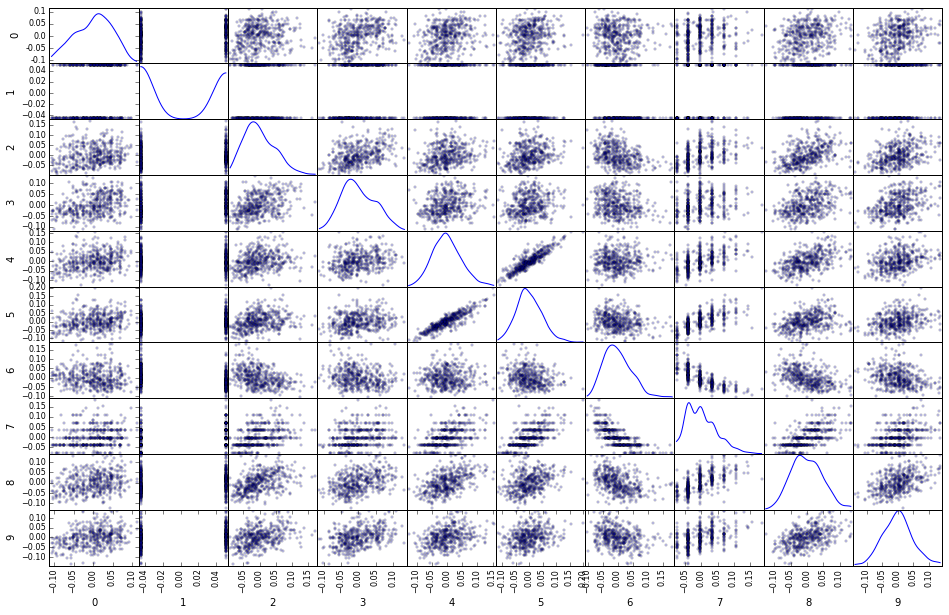

In [4]:
df = pd.DataFrame(diabetes.data)
fig = scatter_matrix(df, alpha=0.2, figsize=(16, 10), diagonal='kde')

In [1]:
import random
plt.figure(1, figsize=(3, 3))
plt.imshow(randomdigits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

NameError: name 'plt' is not defined

## Regressions

Regressions are a type of supervised learning algorithm, where, given continuous input data, the object is to fit a function that is able to predict the continuous value of input features.

### Linear Regression
Linear regression fits a linear model (a line in two dimensions) to the data.

In [12]:
from sklearn.linear_model import LinearRegression

# Fit regression to diabetes dataset
model = LinearRegression()
model.fit(diabetes.data, diabetes.target)

expected  = diabetes.target
predicted = model.predict(diabetes.data)

# Evaluate fit of the model
print "Mean Squared Error: %0.3f" % mse(expected, predicted)
print "Coefficient of Determination: %0.3f" % r2_score(expected, predicted)

Mean Squared Error: 2859.690
Coefficient of Determination: 0.518


### Perceptron

A primitive neural network that learns weights for input vectors and transfers the weights through a network to make a prediction.

In [13]:
from sklearn.linear_model import Perceptron

model = Perceptron()
model.fit(diabetes.data, diabetes.target)

expected  = diabetes.target
predicted = model.predict(diabetes.data)

# Evaluate fit of the model
print "Mean Squared Error: %0.3f" % mse(expected, predicted)
print "Coefficient of Determination: %0.3f" % r2_score(expected, predicted)

Mean Squared Error: 8815.502
Coefficient of Determination: -0.487


### k-Nearest Neighbor Regression

Makes predictions by locating similar cases and returning the average majority.

In [14]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
model.fit(diabetes.data, diabetes.target)

expected  = diabetes.target
predicted = model.predict(diabetes.data)

# Evaluate fit of the model
print "Mean Squared Error: %0.3f" % mse(expected, predicted)
print "Coefficient of Determination: %0.3f" % r2_score(expected, predicted)

Mean Squared Error: 2342.556
Coefficient of Determination: 0.605


### Classification and Regression Trees (CART)

Makes splits of the best separation of the data for the predictions being made.

In [15]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(diabetes.data, diabetes.target)

expected  = diabetes.target
predicted = model.predict(diabetes.data)

# Evaluate fit of the model
print "Mean Squared Error: %0.3f" % mse(expected, predicted)
print "Coefficient of Determination: %0.3f" % r2_score(expected, predicted)

Mean Squared Error: 0.000
Coefficient of Determination: 1.000


### Random Forest

Random forest is an ensemble method that creates a number of decision trees using the CART algorithm, each on a different subset of the data. The general approach to creating the ensemble is bootstrap aggregation of the decision trees (bagging).

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(diabetes.data, diabetes.target)

expected  = diabetes.target
predicted = model.predict(diabetes.data)

# Evaluate fit of the model
print "Mean Squared Error: %0.3f" % mse(expected, predicted)
print "Coefficient of Determination: %0.3f" % r2_score(expected, predicted)

### AdaBoost

Adaptive Boosting (AdaBoost) is an ensemble method that sums the predictions made by multiple decision trees. Additional models are added and trained on instances that were incorrectly predicted (boosting)

In [19]:
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor()
model.fit(diabetes.data, diabetes.target)

expected  = diabetes.target
predicted = model.predict(diabetes.data)

# Evaluate fit of the model
print "Mean Squared Error: %0.3f" % mse(expected, predicted)
print "Coefficient of Determination: %0.3f" % r2_score(expected, predicted)

Mean Squared Error: 2288.682
Coefficient of Determination: 0.614


### Support Vector Machines

Uses the SVM algorithm (transforming the problem space into higher dimensions in order to use kernel methods) to make predictions for a linear function.

In [18]:
from sklearn.svm import SVR

model = SVR()
model.fit(diabetes.data, diabetes.target)

expected  = diabetes.target
predicted = model.predict(diabetes.data)

# Evaluate fit of the model
print "Mean Squared Error: %0.3f" % mse(expected, predicted)
print "Coefficient of Determination: %0.3f" % r2_score(expected, predicted)

Mean Squared Error: 6024.465
Coefficient of Determination: -0.016


## Regularization

Regularization methods decrease the over-fitting of a model by penalizing complexity. These are usually demonstrated on regression algorithms, which is why they are included in this section.

### Ridge Regression

Also known as Tikhonov regularization penalizes a least squares regression model on the square of the absolute magnitiude of the coefficients (the L2 norm)

In [16]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.1)
model.fit(diabetes.data, diabetes.target)

expected  = diabetes.target
predicted = model.predict(diabetes.data)

# Evaluate fit of the model
print "Mean Squared Error: %0.3f" % mse(expected, predicted)
print "Coefficient of Determination: %0.3f" % r2_score(expected, predicted)

Mean Squared Error: 2890.445
Coefficient of Determination: 0.513


### LASSO

Least Absolute Shrinkage and Selection Operator (LASSO) penalizes the least squares regression on the absolute magnitude of the coefficients (the L1 norm)

In [17]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1)
model.fit(diabetes.data, diabetes.target)

expected  = diabetes.target
predicted = model.predict(diabetes.data)

# Evaluate fit of the model
print "Mean Squared Error: %0.3f" % mse(expected, predicted)
print "Coefficient of Determination: %0.3f" % r2_score(expected, predicted)

Mean Squared Error: 2912.522
Coefficient of Determination: 0.509


## Classification

Classification is a supervised machine learning problem where, given labeled input data (with two or more labels), the task is to fit a function that can predict the discrete class of input data.

### Logistic Regression

Fits a logistic model to data and makes predictions about the probability of a categorical event (between 0 and 1). Logistic regressions make predictions between 0 and 1, so in order to classify multiple classes a one-vs-all scheme is used (one model per class, winner-takes-all).

In [20]:
from sklearn.linear_model import LogisticRegression

splits     = cv.train_test_split(iris.data, iris.target, test_size=0.2)
X_train, X_test, y_train, y_test = splits

model      = LogisticRegression()
model.fit(X_train, y_train)

expected   = y_test
predicted  = model.predict(X_test)

print classification_report(expected, predicted)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        12
          1       0.75      0.75      0.75         4
          2       0.93      0.93      0.93        14

avg / total       0.93      0.93      0.93        30



### LDA

Linear Discriminate Analysis (LDA) fits a conditional probability density function (Gaussian) to the attributes of the classes. The discrimination function is linear.

In [21]:
from sklearn.lda import LDA

splits     = cv.train_test_split(digits.data, digits.target, test_size=0.2)
X_train, X_test, y_train, y_test = splits

model      = LDA()
model.fit(X_train, y_train)

expected   = y_test
predicted  = model.predict(X_test)

print classification_report(expected, predicted)

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        37
          1       0.94      0.96      0.95        47
          2       0.97      1.00      0.98        29
          3       0.97      0.95      0.96        37
          4       0.98      0.96      0.97        49
          5       0.96      0.93      0.95        28
          6       0.97      0.97      0.97        30
          7       0.93      0.93      0.93        29
          8       0.89      0.91      0.90        43
          9       0.84      0.87      0.86        31

avg / total       0.95      0.94      0.94       360



/usr/local/lib/python2.7/site-packages/sklearn/lda.py:161: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


### Naive Bayes

Uses Bayes Theorem (with a naive assumption) to model the conditional relationship of each attribute to the class.

In [23]:
from sklearn.naive_bayes import GaussianNB

splits     = cv.train_test_split(iris.data, iris.target, test_size=0.2)
X_train, X_test, y_train, y_test = splits

model      = GaussianNB()
model.fit(X_train, y_train)

expected   = y_test
predicted  = model.predict(X_test)

print classification_report(expected, predicted)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         7
          1       0.93      1.00      0.96        13
          2       1.00      0.90      0.95        10

avg / total       0.97      0.97      0.97        30



### k-Nearest Neighbor

Makes predictions by locating similar instances via a similarity function or distance and averaging the majority of the most similar. 

In [29]:
from sklearn.neighbors import KNeighborsClassifier

# splits     = cv.train_test_split(digits.data, digits.target, test_size=0.2)
# X_train, X_test, y_train, y_test = splits

# model      = KNeighborsClassifier(20)
# model.fit(X_train, y_train)

# expected   = y_test
# predicted  = model.predict(X_test)

# print classification_report(expected, predicted)

help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors.classification:

class KNeighborsClassifier(sklearn.neighbors.base.NeighborsBase, sklearn.neighbors.base.KNeighborsMixin, sklearn.neighbors.base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, optional (default = 5)
 |      Number of neighbors to use by default for :meth:`k_neighbors` queries.
 |  
 |  weights : str or callable
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of a query point will have a
 |        greater influence than neighbors which are further away.
 |      - [callable] : a user-defined function which accepts an
 |        array of distances, and returns 

### Decision Trees

Decision trees use the CART algorithm to make predictions by making splits that best fit the data.

In [31]:
# from sklearn.tree import DecisionTreeClassifier

# splits     = cv.train_test_split(iris.data, iris.target, test_size=0.2)
# X_train, X_test, y_train, y_test = splits

# model      = DecisionTreeClassifier()
# model.fit(X_train, y_train)

# expected   = y_test
# predicted  = model.predict(X_test)

# print classification_report(expected, predicted)

help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree.tree:

class DecisionTreeClassifier(BaseDecisionTree, sklearn.base.ClassifierMixin)
 |  A decision tree classifier.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : string, optional (default="best")
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_features : int, float, string or None, optional (default=None)
 |      The number of features to consider when looking for the best split:
 |        - If int, then consider `max_features` features at each split.
 |        - If float, then `max_features` is a percentage and
 |          `int(max_features * n_features)` features are consi

### SVMs

Support Vector Machines (SVM) uses points in transformed problem space that separates the classes into groups.

In [ ]:
from sklearn.svm import SVC

kernels = ['linear', 'poly', 'rbf']

splits     = cv.train_test_split(digits.data, digits.target, test_size=0.2)
X_train, X_test, y_train, y_test = splits

for kernel in kernels:
    if kernel != 'poly':
        model      = SVC(kernel=kernel)
    else:
        model      = SVC(kernel=kernel, degree=3)
        
    model.fit(X_train, y_train)
    expected   = y_test
    predicted  = model.predict(X_test)

    print classification_report(expected, predicted)

### Random Forest

Random Forest is an ensemble of decision trees on different subsets of the dataset. The ensemble is created by bootstrap aggregation (bagging).

In [ ]:
from sklearn.ensemble import RandomForestClassifier

splits     = cv.train_test_split(digits.data, digits.target, test_size=0.2)
X_train, X_test, y_train, y_test = splits

model      = RandomForestClassifier()
model.fit(X_train, y_train)

expected   = y_test
predicted  = model.predict(X_test)

print classification_report(expected, predicted)

## Clustering

Clustering algorithms attempt to find patterns in unlabeled data. They are usually grouped into two main categories: centroidal (find the centers of clusters) and hierarchical (find clusters of clusters).

In order to explore clustering, we'll have to generate some fake datasets to use.

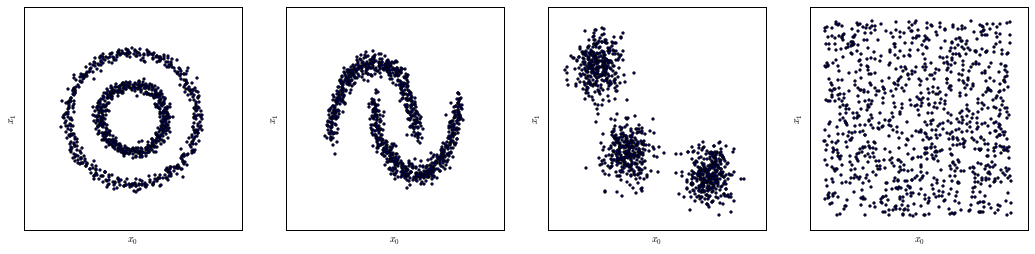

In [6]:
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

N = 1000 # Number of samples in each cluster

# Some colors for later
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

circles = make_circles(n_samples=N, factor=.5, noise=.05)
moons   = make_moons(n_samples=N, noise=.08)
blobs   = make_blobs(n_samples=N, random_state=9)
noise   = np.random.rand(N, 2), None

# Let's see what the data looks like!
fig, axe = plt.subplots(figsize=(18, 4))
for idx, dataset in enumerate((circles, moons, blobs, noise)):
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    
    plt.subplot(1,4,idx+1)
    plt.scatter(X[:,0], X[:,1], marker='.')

    plt.xticks(())
    plt.yticks(())
    plt.ylabel('$x_1$')
    plt.xlabel('$x_0$')

plt.show()

### K-Means Clustering

Partition N samples into k clusters, where each sample belongs to a cluster to which it has the closest mean of the neighbors. This problem is NP-hard, but there are good estimations.

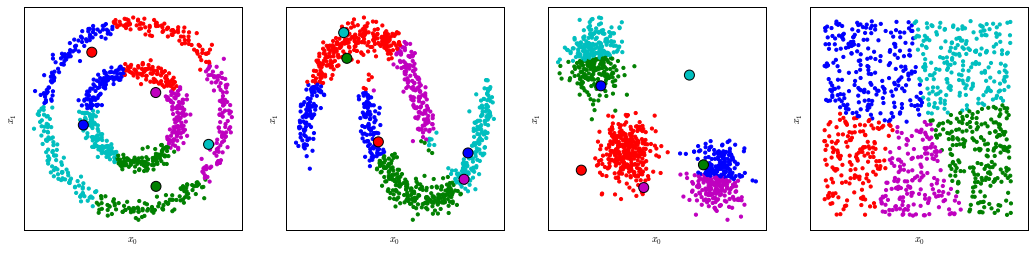

In [8]:
from sklearn.cluster import MiniBatchKMeans

fig, axe = plt.subplots(figsize=(18, 4))
for idx, dataset in enumerate((circles, moons, blobs, noise)):
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    
    # Fit the model with our algorithm
    model = MiniBatchKMeans(n_clusters=5)
    model.fit(X)
    
    # Make Predictions
    predictions = model.predict(X)
    
    # Find centers
    centers = model.cluster_centers_
    center_colors = colors[:len(centers)]
    plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
    
    plt.subplot(1,4,idx+1)
    plt.scatter(X[:, 0], X[:, 1], color=colors[predictions].tolist(), s=10)

    plt.xticks(())
    plt.yticks(())
    plt.ylabel('$x_1$')
    plt.xlabel('$x_0$')

plt.show()

## Affinity Propagation

Clustering based on the concept of "message passing" between data points. Unlike clustering algorithms such as k-means or k-medoids, AP does not require the number of clusters to be determined or estimated before running the algorithm. Like k-medoids, AP finds "exemplars", members of the input set that are representative of clusters

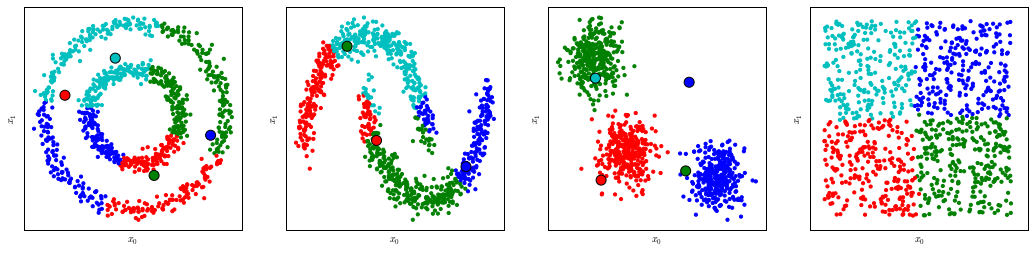

In [14]:
from sklearn.cluster import AffinityPropagation
–

fig, axe = plt.subplots(figsize=(18, 4))
for idx, dataset in enumerate((circles, moons, blobs, noise)):
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    
    # Fit the model with our algorithm
    model = AffinityPropagation(damping=.92, preference=-200)
    model.fit(X)
    
    # Make Predictions
    predictions = model.predict(X)
    
    # Find centers
    centers = model.cluster_centers_
    center_colors = colors[:len(centers)]
    plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
    
    plt.subplot(1,4,idx+1)
    plt.scatter(X[:, 0], X[:, 1], color=colors[predictions].tolist(), s=10)

    plt.xticks(())
    plt.yticks(())
    plt.ylabel('$x_1$')
    plt.xlabel('$x_0$')

plt.show()

